In [20]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.gd as gd
import mlgrad.pbfg as pbfg

import matplotlib.pyplot as plt

In [2]:
lm_orig = model.LinearModel([2.,3.])
lm_orig

In [3]:
N = 100
X = np.random.random((N,1))
Y = lm_orig.evaluate_all(X)
dY = 2.0*np.random.random((N,))-1
Y1 = Y + 0.5*dY*dY

In [4]:
loss_func = loss.Loss(func.Square())
loss_func

In [5]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)

In [14]:
avrfunc = avragg.Average_FG(func.Square(), tol=1.0e-6)
alg_gd = gd.FG(lm_learn, loss_func, tol=1.0e-6)
alg = pbfg.PbFG(avrfunc, alg_gd, tol=1.0e-6, irw=0)
alg.fit(X, Y1)
print("K:", alg.K, lm_learn.param.base)

K: 1 [ 2.18447644  2.92862368]


In [15]:
#print(alg.param_mean, alg.s_mean)
#print(np.sqrt(np.abs(alg.param2_mean - alg.param_mean**2))/np.abs(alg.param_mean), 
#      np.sqrt(np.abs(alg.s2_mean - alg.s_mean**2))/np.abs(alg.s_mean))

In [16]:
lm_learn

In [17]:
Y_p = lm_learn.evaluate_all(X)
#np.abs(Y-Y_p)

In [18]:
import sklearn.metrics as metrics
metrics.r2_score(Y, Y_p)

0.97215082196697189

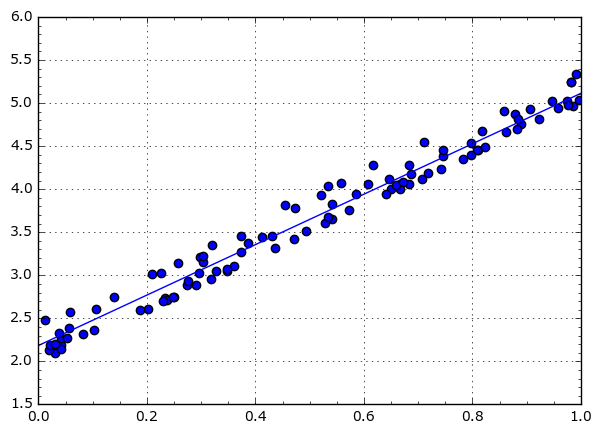

In [19]:
plt.figure(figsize=(7,5))
xs = np.linspace(0., 1., 100)
xs = xs.reshape((-1,1))
ys = lm_learn.evaluate_all(xs)
plt.scatter(X[:,0], Y1, s=36)
plt.plot(xs, ys)
plt.grid(1)
plt.minorticks_on()
plt.xlim(0,1)
plt.show()